In [732]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1.Exploratory Data Analysis
Objectif: 1
- Comprendre du mieux possible nos données.
- Développer une premiere stratégie de modélisation

Checklist de Base
Analyse de Forme:
- variable target: Charge
- ligne de colonnes: 7
- ligne de variable 

In [733]:

dataset_path = "Dataset_Brief.csv"
df = pd.read_csv(dataset_path)

In [734]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

df.describe()

# Supprimer les lignes avec des valeurs manquantes
# df = df.dropna()

# Remplacer les valeurs manquantes par la moyenne
# df['colonne'] = df['colonne'].fillna(df['colonne'].mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [735]:
#duplicates
print(df.duplicated().shape[0])
duplicates = df.duplicated()

duplicates_data = df[duplicates]
# "age", "sex", "bmi", "children", "smoker", "region"
print("\nLignes avec des duplicatas:")
print(duplicates_data)
#
df = df.drop_duplicates(subset=["age", "sex", "bmi", "children", "smoker", "region"], keep='first')
#
print("\nAprès vérification de duplicatas:")
print(df.duplicated().shape[0])


1338

Lignes avec des duplicatas:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Après vérification de duplicatas:
1335


In [736]:
df['age'] = df['age'].astype(int)
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(float).round(2)
df['sex'].replace(['male', 'female'], [0,1], inplace=True)
df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92
1,18,0,33.770,1,0,southeast,1725.55
2,28,0,33.000,3,0,southeast,4449.46
3,33,0,22.705,0,0,northwest,21984.47
4,32,0,28.880,0,0,northwest,3866.86


In [737]:
df['NordOuest'] = df['region'].str.contains('northwest').astype(int)
df['NordEast'] = df['region'].str.contains('northeast').astype(int)
df['SudOuest'] = df['region'].str.contains('southwest').astype(int)
df['SudEast'] = df['region'].str.contains('southeast').astype(int)
df = df.drop('region', axis=1)

df = df[['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges']]
# df.head()
df_copie = df.copy()
df_copie.head()
# # Utiliser get_dummies pour créer les colonnes indicatrices
# dummy_cols = pd.get_dummies(df['region'], prefix='region')

# # Concaténer les colonnes indicatrices au dataframe d'origine
# df = pd.concat([df, dummy_cols], axis=1)
# # Supprimer la colonne d'origine si nécessaire
# # df = df.drop('categorique_col', axis=1)

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
0,19,1,27.900,0,1,0,0,1,0,16884.92
1,18,0,33.770,1,0,0,0,0,1,1725.55
2,28,0,33.000,3,0,0,0,0,1,4449.46
3,33,0,22.705,0,0,1,0,0,0,21984.47
4,32,0,28.880,0,0,1,0,0,0,3866.86


In [738]:
# duplicates = df_copie.duplicated(subset=['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges'])
# duplicates_data = df_copie[duplicates]
# #
# print("\nLignes avec des duplicatas:")
# print(duplicates_data)
# #
# df_copie = df_copie.drop_duplicates(subset=['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges'], keep='first')
# #
# # print("\nAprès vérification de duplicatas:")
# print(df_copie.head())
# #

0    1061
1     274
Name: smoker, dtype: int64


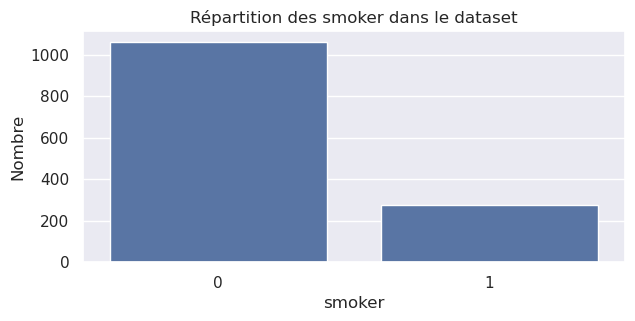

0    675
1    660
Name: sex, dtype: int64


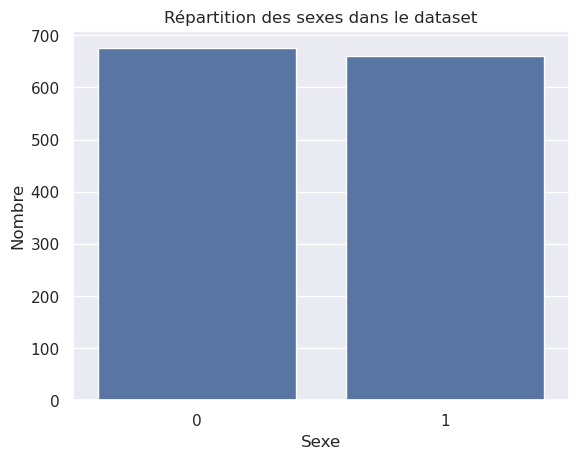

In [739]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 3))

# Compter le nombre d'hommes et de femmes
sex_counts = df['sex'].value_counts()
# Compter le nombre fumer et non fumer
smoker_counts = df["smoker"].value_counts()

#Tracer le graphique à barres
sns.barplot(x=smoker_counts.index, y=smoker_counts.values)
plt.title('Répartition des smoker dans le dataset')
plt.xlabel('smoker') 
plt.ylabel('Nombre')
print(df['smoker'].value_counts())

# Afficher le graphique
plt.show()

sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Répartition des sexes dans le dataset')
plt.xlabel('Sexe') 
plt.ylabel('Nombre')
print(df['sex'].value_counts())

# Afficher le graphique
plt.show()

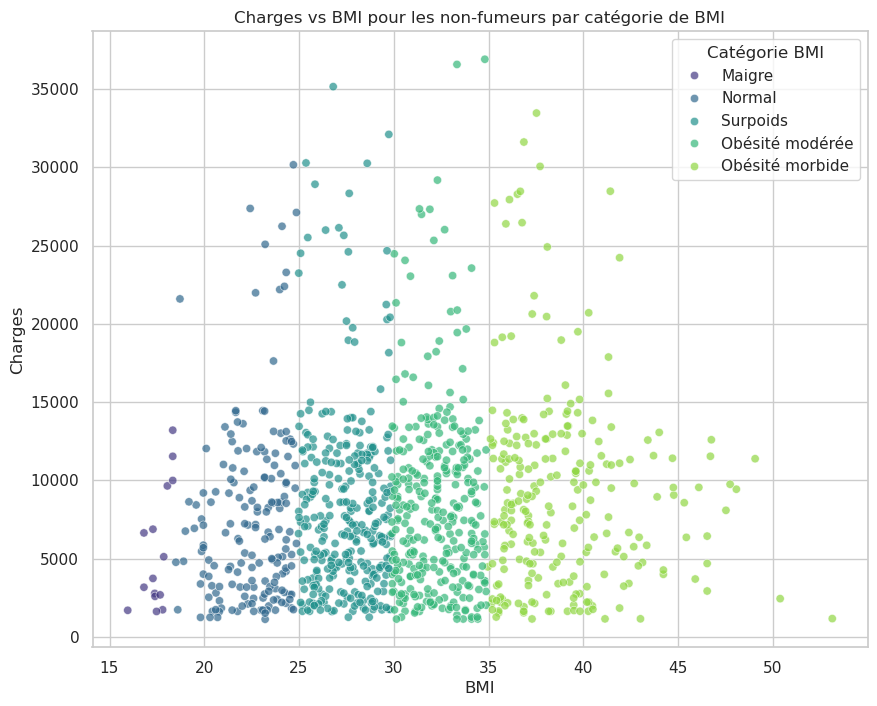

In [740]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']

# Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Filtrer les non-fumeurs (smoker == 0)
non_smokers_df = df[df['smoker'] == 0]

# Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
sns.scatterplot(x='bmi', y='charges', hue='bmi_category', data=non_smokers_df, alpha=0.7, palette='viridis')

# Ajouter des étiquettes au graphique
plt.title('Charges vs BMI pour les non-fumeurs par catégorie de BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Afficher la légende
plt.legend(title='Catégorie BMI')

# Afficher le graphique
plt.show()

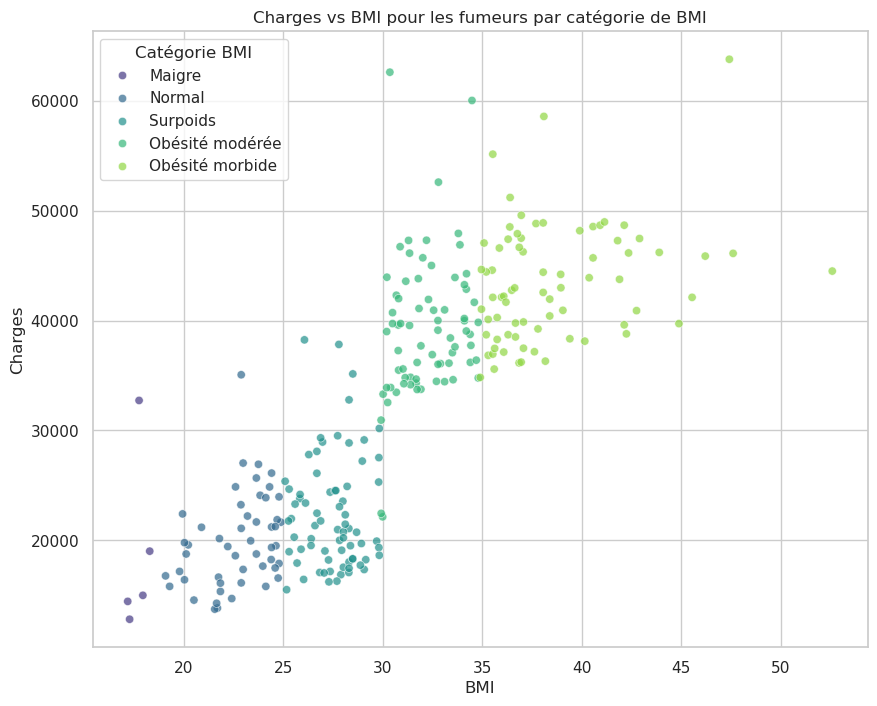

In [741]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']

# Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Filtrer les fumeurs (smoker == 1)
smokers_df = df[df['smoker'] == 1]

# Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
sns.scatterplot(x='bmi', y='charges', hue='bmi_category', data=smokers_df, alpha=0.7, palette='viridis')

# Ajouter des étiquettes au graphique
plt.title('Charges vs BMI pour les fumeurs par catégorie de BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Afficher la légende
plt.legend(title='Catégorie BMI')

# Afficher le graphique
plt.show()

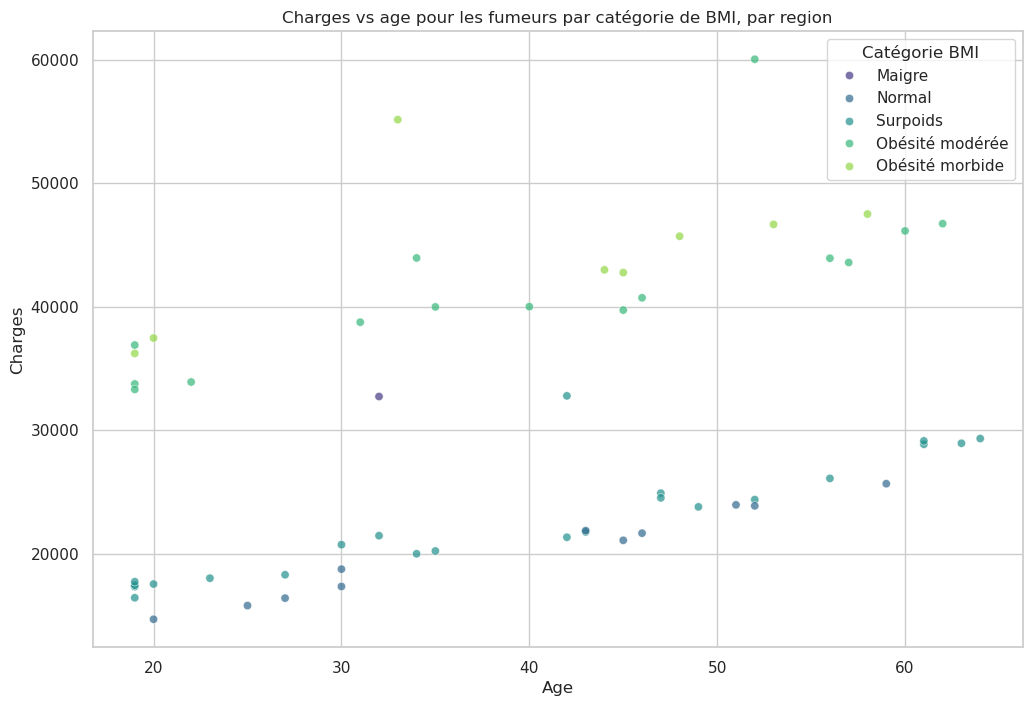

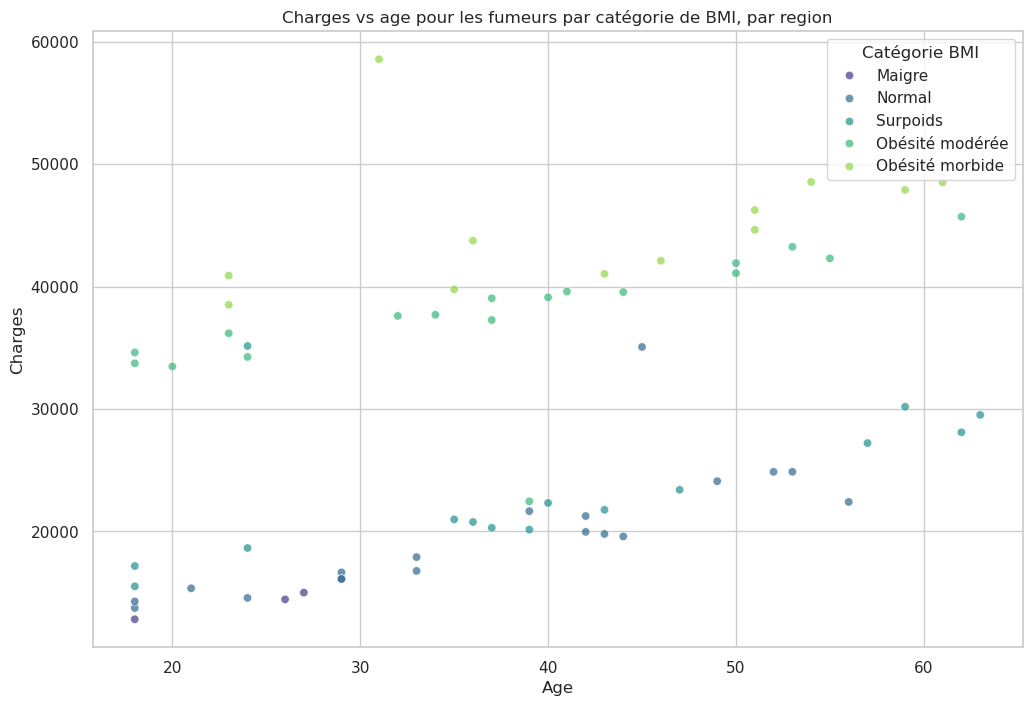

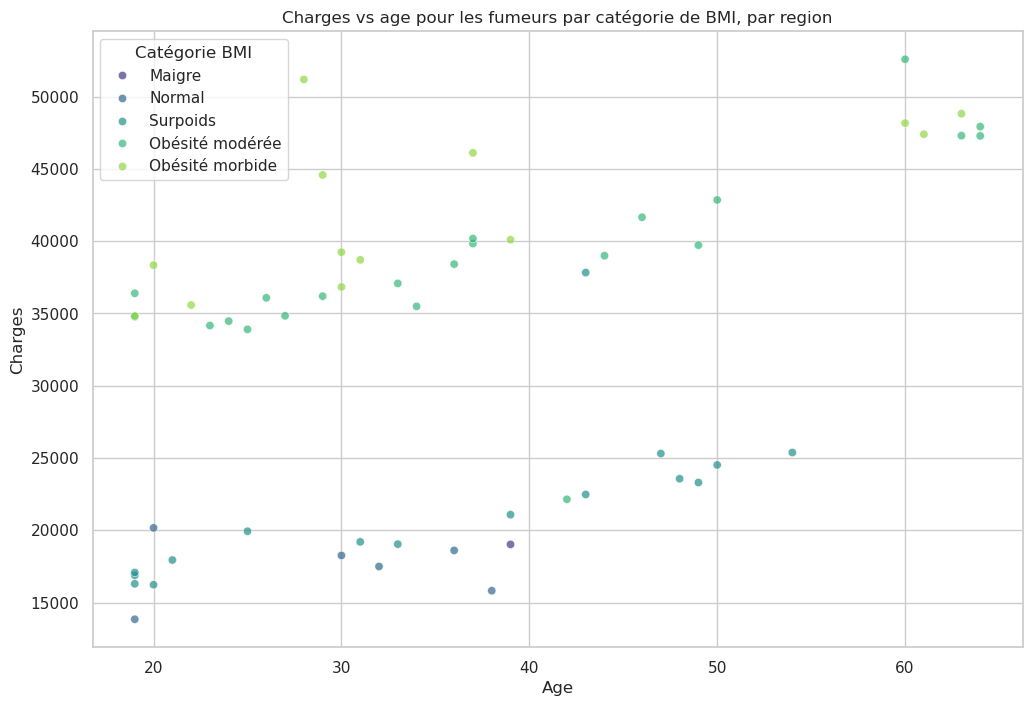

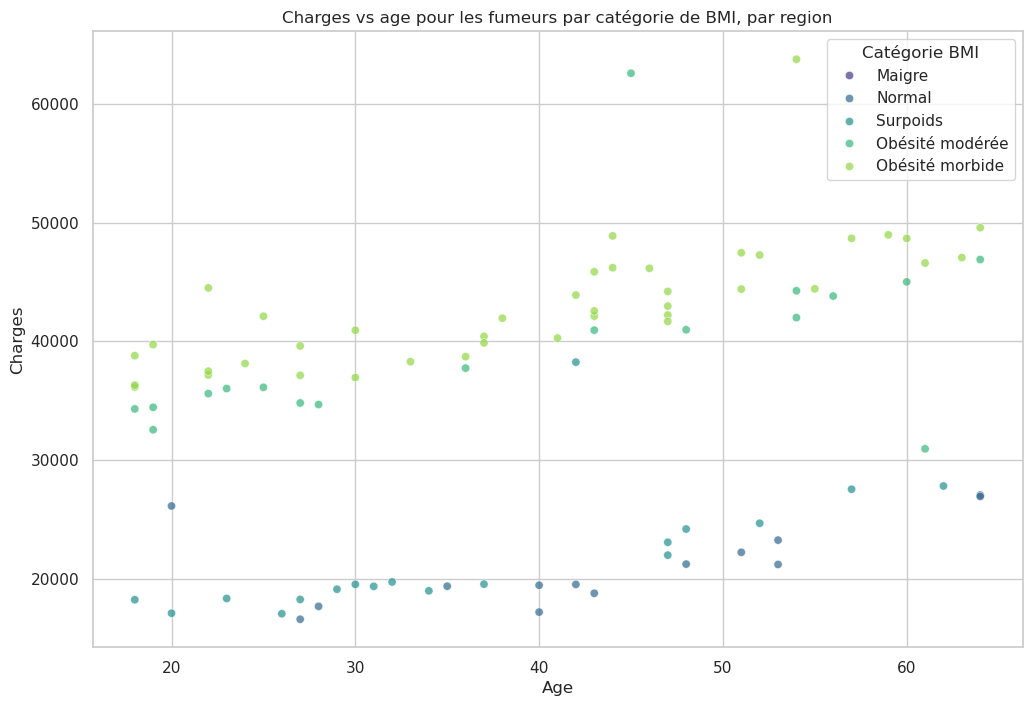

In [742]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']
for region in regions:

    data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]
    bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
    labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']
    # Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
    df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

    # Filtrer les fumeurs (smoker == 1)
   


    # Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    # Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
    sns.scatterplot(x='age', y='charges', hue='bmi_category', data=data_subset, alpha=0.7, palette='viridis')

    # Ajouter des étiquettes au graphique
    plt.title('Charges vs age pour les fumeurs par catégorie de BMI, par region')
    plt.xlabel('Age')
    plt.ylabel('Charges')

    # Afficher la légende
    plt.legend(title='Catégorie BMI')

    # Afficher le graphique
    plt.show()

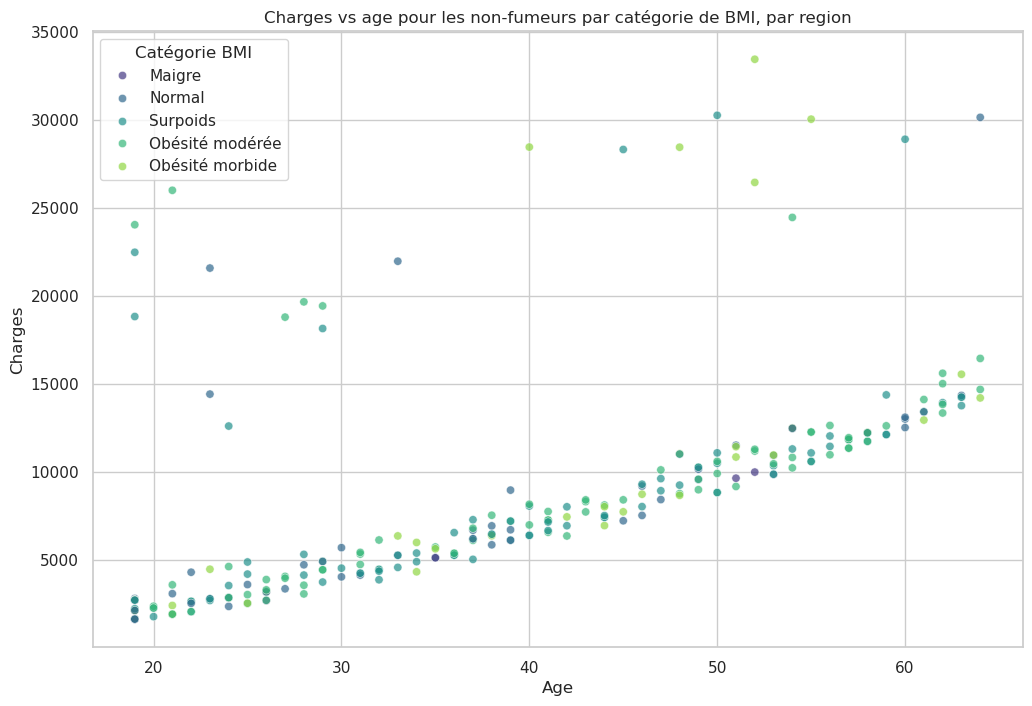

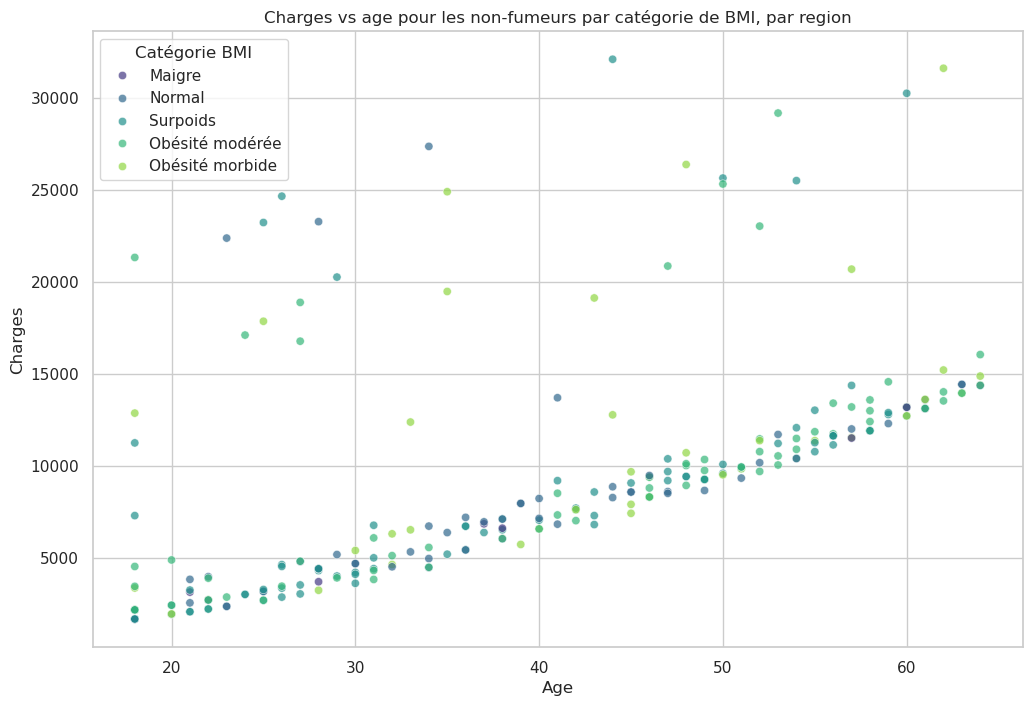

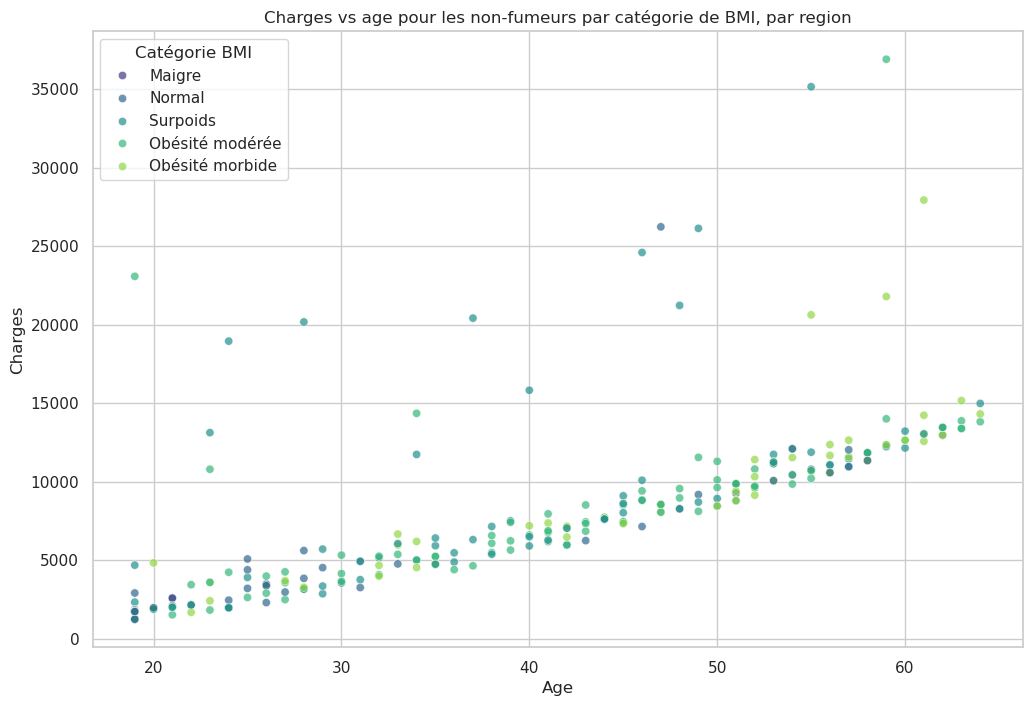

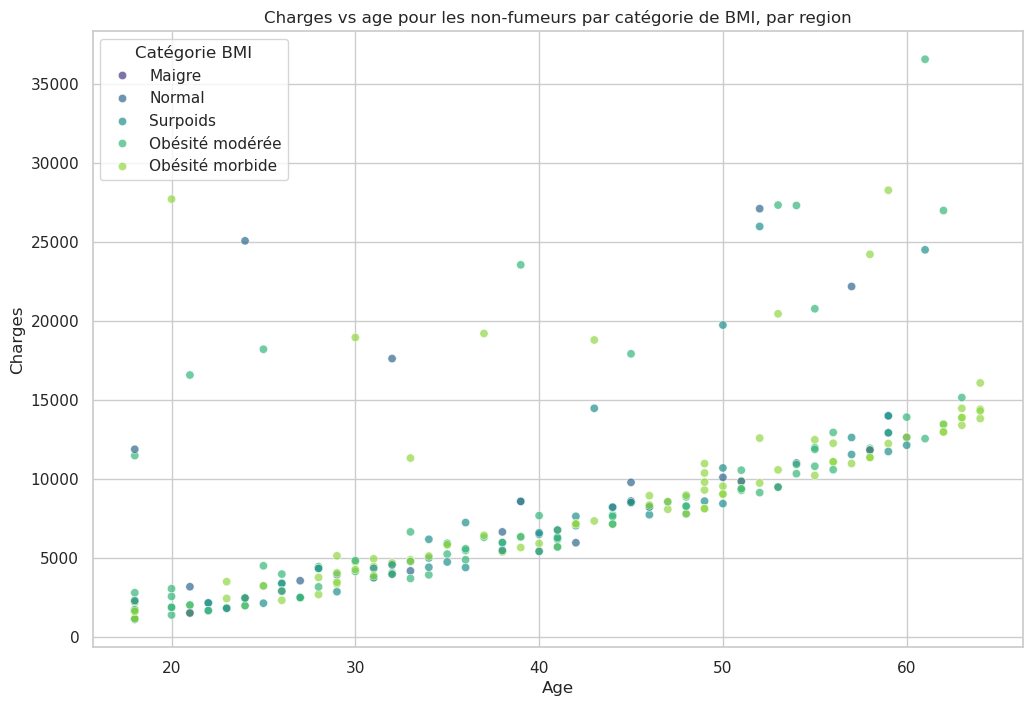

In [743]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']
for region in regions:

    data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]
    bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
    labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']
    # Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
    df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

    # Filtrer les fumeurs (smoker == 1)
   


    # Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    # Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
    sns.scatterplot(x='age', y='charges', hue='bmi_category', data=data_subset, alpha=0.7, palette='viridis')

    # Ajouter des étiquettes au graphique
    plt.title('Charges vs age pour les non-fumeurs par catégorie de BMI, par region')
    plt.xlabel('Age')
    plt.ylabel('Charges')

    # Afficher la légende
    plt.legend(title='Catégorie BMI')

    # Afficher le graphique
    plt.show()

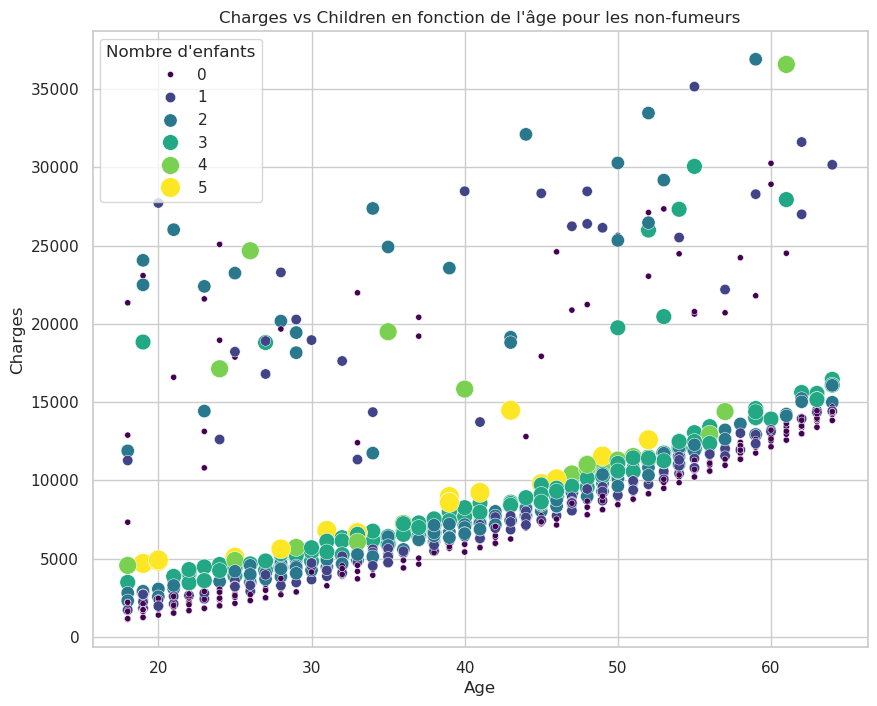

In [744]:
# Filtrer les non-fumeurs (smoker == 0)
non_smokers_df = df[df['smoker'] == 0]

# Créer un graphique de dispersion (scatter plot) avec les axes charges et children, en fonction de l'âge
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Tracer le graphique de dispersion
sns.scatterplot(x='age', y='charges', hue='children', data=non_smokers_df, palette='viridis', size='children', sizes=(20, 200))

# Ajouter des étiquettes au graphique
plt.title('Charges vs Children en fonction de l\'âge pour les non-fumeurs')
plt.xlabel('Age')
plt.ylabel('Charges')

# Afficher la légende
plt.legend(title='Nombre d\'enfants')

# Afficher le graphique
plt.show()

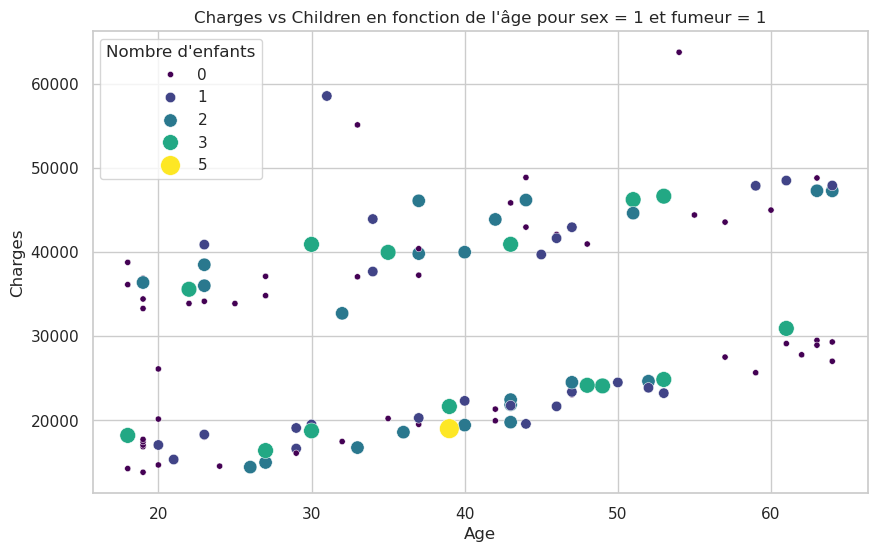

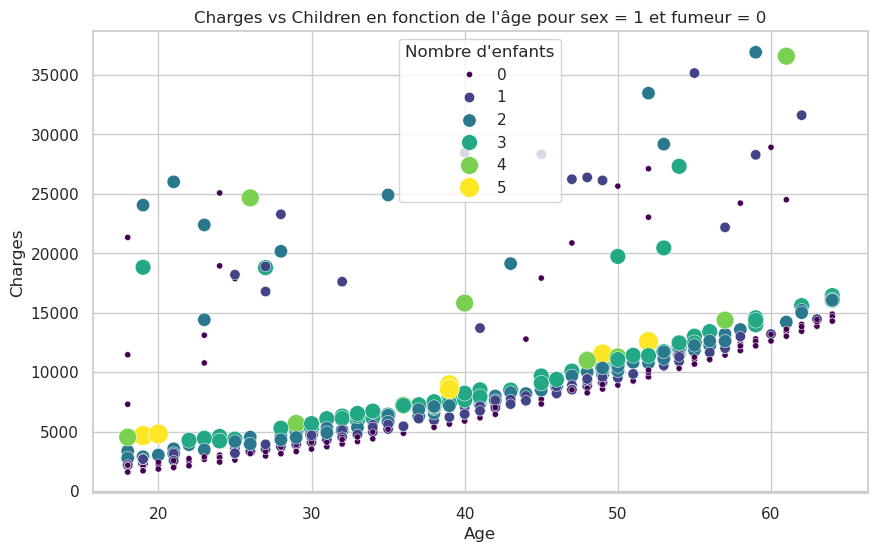

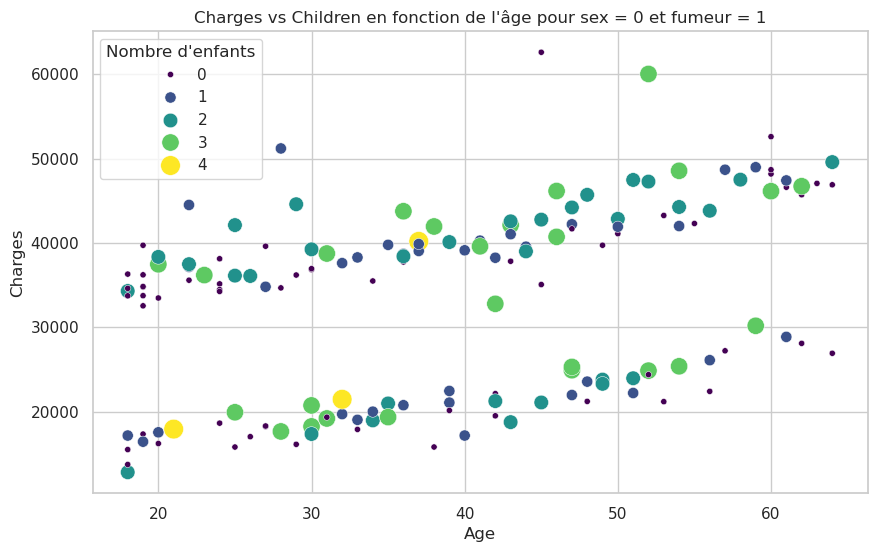

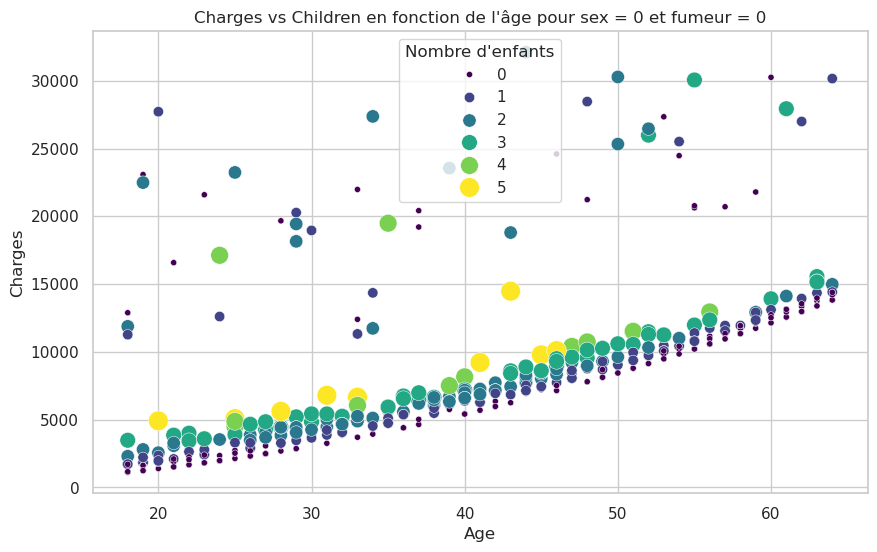

In [745]:
unique_sex_values = df['sex'].unique()
unique_smoker_values = df['smoker'].unique()

# Boucle pour créer un graphique de dispersion pour chaque valeur de 'sex'
for sex_value in unique_sex_values:
    for smoker_value in unique_smoker_values:
        # Filtrer les données pour la valeur de 'sex' actuelle
        data_filter_df = df[(df['sex'] == sex_value) & (df['smoker'] == smoker_value)]

        # Créer un graphique de dispersion
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='age', y='charges', hue='children', data=data_filter_df, palette='viridis', size='children', sizes=(20, 200))
        plt.title(f'Charges vs Children en fonction de l\'âge pour sex = {sex_value} et fumeur = {smoker_value}')
        plt.xlabel('Age')
        plt.ylabel('Charges')
        plt.legend(title='Nombre d\'enfants')
        plt.show()

Matrice de corrélation :
                age       sex       bmi  children    smoker  NordOuest  \
age        1.000000  0.022155  0.110911  0.039569 -0.026788   0.000215   
sex        0.022155  1.000000 -0.047338 -0.016495 -0.075900   0.013351   
bmi        0.110911 -0.047338  1.000000  0.013560  0.004190  -0.135760   
children   0.039569 -0.016495  0.013560  1.000000  0.006645   0.025296   
smoker    -0.026788 -0.075900  0.004190  0.006645  1.000000  -0.036767   
NordOuest  0.000215  0.013351 -0.135760  0.025296 -0.036767   1.000000   
NordEast   0.003240  0.001101 -0.137790 -0.022425  0.003059  -0.319822   
SudOuest   0.008148  0.004629 -0.005724  0.020784 -0.037616  -0.321128   
SudEast   -0.011184 -0.018387  0.268952 -0.022835  0.068763  -0.345953   
charges    0.297956 -0.057468  0.198453  0.066877  0.787313  -0.039074   

           NordEast  SudOuest   SudEast   charges  
age        0.003240  0.008148 -0.011184  0.297956  
sex        0.001101  0.004629 -0.018387 -0.057468  
bmi 

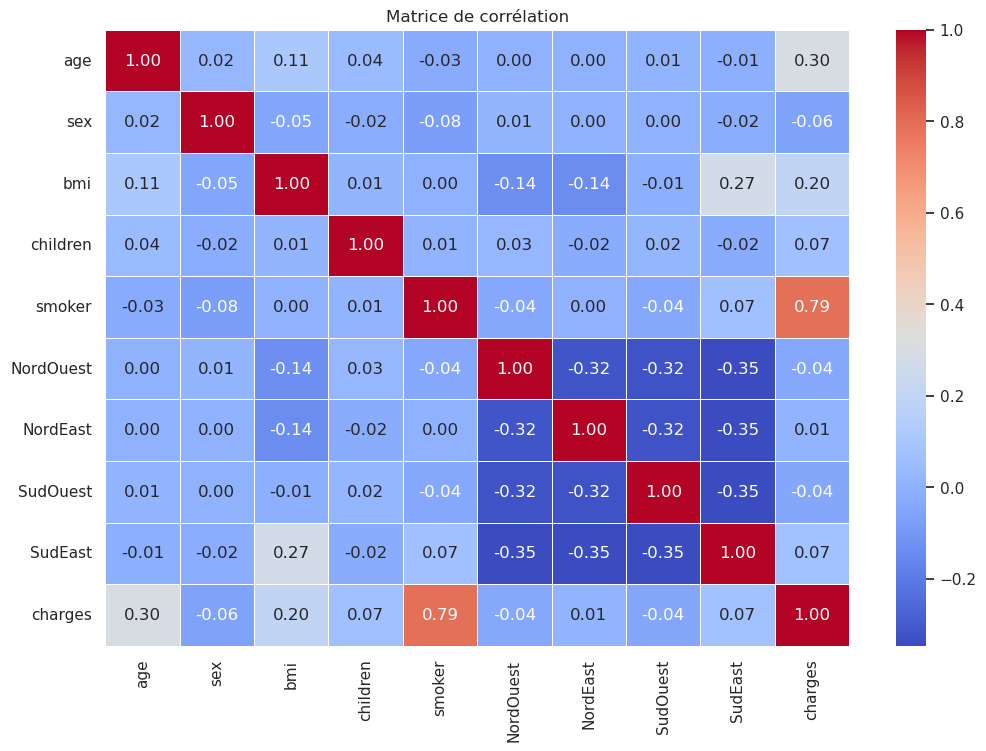

In [746]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Visualiser la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation')
plt.show()

In [747]:
y_target = df['charges']
selected_features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']]

# Créer une colonne combinée pour la stratification
df['stratify_col'] = df['sex'] + df['smoker'] + df['NordOuest'] + df['NordEast'] + df['SudOuest'] + df['SudEast']

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(selected_features, y_target, test_size=0.2, random_state=42, stratify=df['stratify_col'])

# Ne pas oublier de supprimer la colonne de stratification après la division des données
df.drop('stratify_col', axis=1, inplace=True)

In [748]:
# Check the value counts of 'charges' in the training set
y_train.value_counts()


48673.56    1
1146.80     1
29141.36    1
4949.76     1
22412.65    1
           ..
5594.85     1
35160.13    1
12231.61    1
13405.39    1
24915.05    1
Name: charges, Length: 1068, dtype: int64

Mean Squared Error (Lasso): 30413152.79
R-squared (Lasso): 0.75


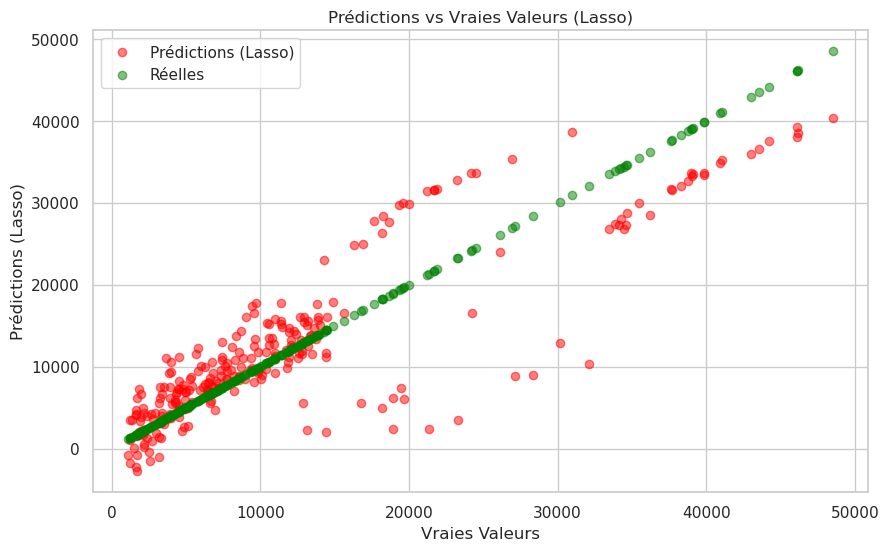

In [749]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso  # Importer le modèle Lasso
from sklearn.metrics import mean_squared_error, r2_score

# ... (votre code pour diviser les données, entraîner le modèle, etc.)

# Créer un modèle Lasso (si ce n'est pas déjà fait dans votre code précédent)
lasso_model = Lasso(alpha=1.0)

# Entraîner le modèle Lasso sur les données d'entraînement
lasso_model.fit(X_train, y_train)

# Utiliser le modèle Lasso pour faire des prédictions sur l'ensemble de test
y_pred_lasso = lasso_model.predict(X_test)

# Évaluer la performance du modèle
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso:.2f}')
print(f'R-squared (Lasso): {r2_lasso:.2f}')

# Visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Prédictions (Lasso)', color='red')
plt.scatter(y_test, y_test, alpha=0.5, label='Réelles', color='green')
plt.title('Prédictions vs Vraies Valeurs (Lasso)')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions (Lasso)')
plt.legend()
plt.show()


# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state=0)

# from sklearn.metrics import f1_score, confusion_matrix, classification_report
# from sklearn.model_selection import learning_curve
# def evaluation(model):
#     model.fit(X_train, y_train)
#     ypred = model.predict(X_test)

#     print(confusion_matrix(y_test, ypred))
#     print(classification_report(y_test, ypred))
#     evaluation(model)
#     plt.scatter(X_train,y_train)
#     plt.plot(X_test, ypred, c='r')


# print("Dimensions des Caractéristiques(X):", selected_features.shape)
# print("Dimensions de la variable cible (y):", y_target.shape)

# X = selected_features.values
# y = y_target.values

# print("Dimensions de X après conversion en Numpy:", X.shape)
# print("Dimensions de y après conversion en NumPY:", y.shape)

# from sklearn.linear_model import LinearRegression

# # Créer le modèle de régression linéaire
# model = LinearRegression()

# # Ajuster le modèle
# model.fit(X, y)

# # Afficher les coefficients de régression
# print("Coefficients de régression:")
# print(model.coef_)

R-squared (Lasso) with alpha=0.01: 0.78
R-squared (Lasso) with alpha=0.1: 0.78
R-squared (Lasso) with alpha=1.0: 0.78
R-squared (Lasso) with alpha=10.0: 0.78
Meilleur R-squared obtenu avec alpha=0.01: 0.78


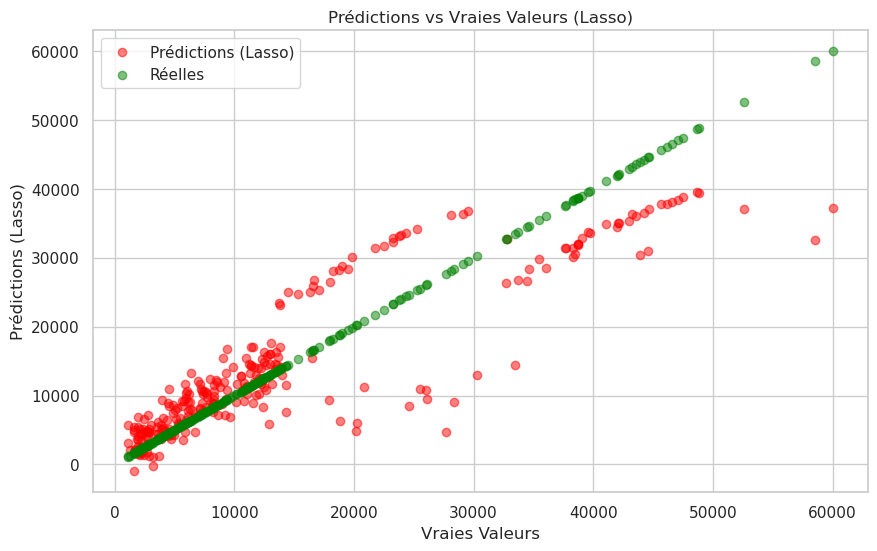

In [750]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score



# Diviser le DataFrame en features (X) et la target variable (y)
X = df[['age', 'smoker', 'bmi', 'children', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']]
y = df['charges']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des valeurs d'alpha à essayer
alpha_values = [0.01, 0.1, 1.0, 10.0]  # Ajoutez d'autres valeurs d'alpha selon votre besoin

best_r2 = 0.0
best_alpha = 0.0

# Boucle sur les différentes valeurs d'alpha
for alpha in alpha_values:
    # Créer et entraîner un modèle Lasso avec l'alpha actuel
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_model.coef_

    # Faire des prédictions sur l'ensemble de test
    y_pred_lasso = lasso_model.predict(X_test)

    # Évaluer la performance du modèle
    r2 = r2_score(y_test, y_pred_lasso)

    print(f'R-squared (Lasso) with alpha={alpha}: {r2:.2f}')

    # Mettre à jour la meilleure valeur d'alpha si le R-squared actuel est meilleur
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

print(f"Meilleur R-squared obtenu avec alpha={best_alpha}: {best_r2:.2f}")

# Utiliser le modèle Lasso avec le meilleur alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

# Visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Prédictions (Lasso)', color='red')
plt.scatter(y_test, y_test, alpha=0.5, label='Réelles', color='green')
plt.title('Prédictions vs Vraies Valeurs (Lasso)')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions (Lasso)')
plt.legend()
plt.show()

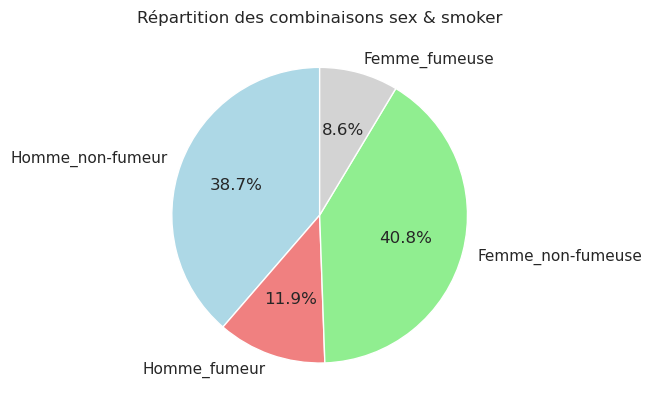

In [751]:


# Créer un DataFrame agrégé pour les combinaisons 'sex' et 'smoker'
aggregated_df = df.groupby(['sex', 'smoker']).size().reset_index(name='count')

# Créer un diagramme circulaire
labels = ['Homme_non-fumeur', 'Homme_fumeur', 'Femme_non-fumeuse', 'Femme_fumeuse']
sizes = aggregated_df['count']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgray']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Répartition des combinaisons sex & smoker')
plt.show()

R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.01: 0.7815
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.1: 0.7815
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.5: 0.7816
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.7: 0.7816
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.9: 0.7816
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.01: 0.7804
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.1: 0.7805
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.5: 0.7810
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.7: 0.7813
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.9: 0.7815
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.01: 0.7648
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.1: 0.7667
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.5: 0.7742
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.7: 0.7775
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.9: 0.7804
R-squared (Elastic Net

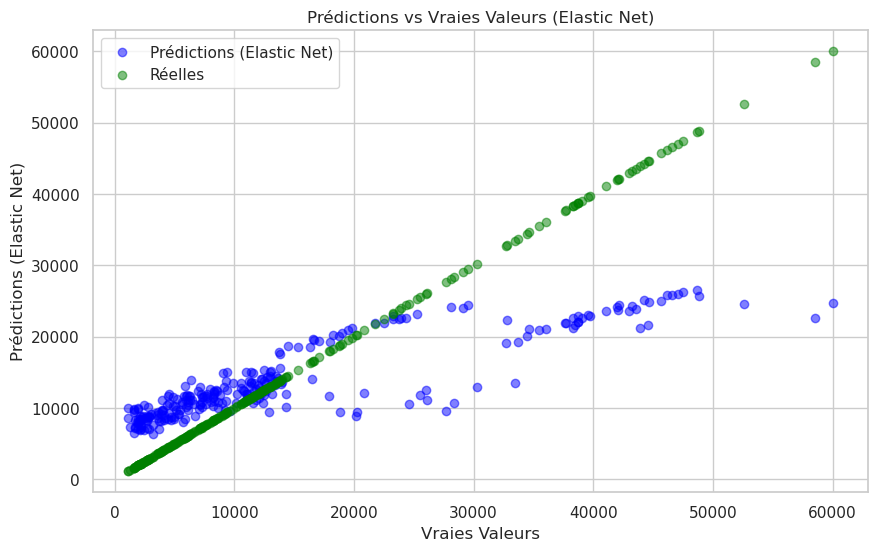

In [752]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# pd.crosstab(df['sex'], df['smoker'])

# Diviser le DataFrame en features (X) et la target variable (y)
X = df[['age', 'smoker', 'bmi', 'children', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']]
y = df['charges']

# Normaliser les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Liste des valeurs d'alpha et de rapport de mélange à essayer
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.01, 0.1, 0.5, 0.7, 0.9]

best_r2 = 0.0
best_alpha = 0.0
best_l1_ratio = 0.0

# Boucle sur les différentes valeurs d'alpha et de rapport de mélange
for alpha in alpha_values:
    for l1_ratio in l1_ratios:
        # Créer et entraîner un modèle Elastic Net avec les valeurs d'alpha et de rapport de mélange actuelles
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000)
        elastic_net_model.fit(X_train, y_train)

        # Faire des prédictions sur l'ensemble de test
        y_pred_elastic_net = elastic_net_model.predict(X_test)

        # Évaluer la performance du modèle
        r2 = r2_score(y_test, y_pred_elastic_net)

        print(f'R-squared (Elastic Net) with alpha={alpha} and l1_ratio={l1_ratio}: {r2:.4f}')

        # Mettre à jour la meilleure combinaison d'alpha et de rapport de mélange si le R-squared actuel est meilleur
        if r2 > best_r2:
            best_r2 = r2
            best_alpha = alpha
            best_l1_ratio = l1_ratio

print(f"Meilleur R-squared obtenu avec alpha={best_alpha} et l1_ratio={best_l1_ratio}: {best_r2:.4f}")

# Utiliser le modèle Elastic Net avec les meilleurs hyperparamètres
elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=1000000)
elastic_net_model.fit(X_train, y_train)

# Visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5, label='Prédictions (Elastic Net)', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='Réelles', color='green')
plt.title('Prédictions vs Vraies Valeurs (Elastic Net)')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions (Elastic Net)')
plt.legend()
plt.show()

In [753]:
# sns.pairplot(df.corr())

R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.01: 0.7505
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.1: 0.7505
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.5: 0.7506
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.7: 0.7507
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.9: 0.7507
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.01: 0.7471
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.1: 0.7476
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.5: 0.7494
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.7: 0.7500
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.9: 0.7505
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.01: 0.6475
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.1: 0.6587
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.5: 0.7086
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.7: 0.7309
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.9: 0.7470
R-squared (Elastic Net

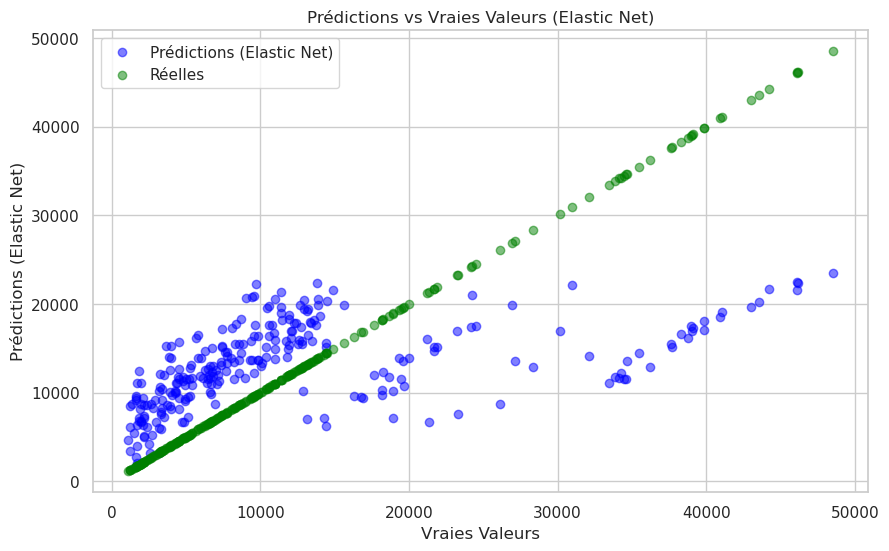

In [754]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Diviser le DataFrame en features (X) et la target variable (y)
X = df[['age', 'smoker', 'bmi', 'children', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']]
y = df['charges']

# Normaliser les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Créer une colonne combinée pour la stratification
df['stratify_col'] = df['sex'] + df['smoker'] + df['NordOuest'] + df['NordEast'] + df['SudOuest'] + df['SudEast']

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(selected_features, y_target, test_size=0.2, random_state=42, stratify=df['stratify_col'])

# Ne pas oublier de supprimer la colonne de stratification après la division des données
df.drop('stratify_col', axis=1, inplace=True)

# Liste des valeurs d'alpha et de rapport de mélange à essayer
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.01, 0.1, 0.5, 0.7, 0.9]

best_r2 = 0.0
best_alpha = 0.0
best_l1_ratio = 0.0

# Boucle sur les différentes valeurs d'alpha et de rapport de mélange
for alpha in alpha_values:
    for l1_ratio in l1_ratios:
        # Créer et entraîner un modèle Elastic Net avec les valeurs d'alpha et de rapport de mélange actuelles
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        elastic_net_model.fit(X_train, y_train)

        # Faire des prédictions sur l'ensemble de test
        y_pred_elastic_net = elastic_net_model.predict(X_test)

        # Évaluer la performance du modèle
        r2 = r2_score(y_test, y_pred_elastic_net)

        print(f'R-squared (Elastic Net) with alpha={alpha} and l1_ratio={l1_ratio}: {r2:.4f}')

        # Mettre à jour la meilleure combinaison d'alpha et de rapport de mélange si le R-squared actuel est meilleur
        if r2 > best_r2:
            best_r2 = r2
            best_alpha = alpha
            best_l1_ratio = l1_ratio

print(f"Meilleur R-squared obtenu avec alpha={best_alpha} et l1_ratio={best_l1_ratio}: {best_r2:.4f}")

# Utiliser le modèle Elastic Net avec les meilleurs hyperparamètres
elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=100000)
elastic_net_model.fit(X_train, y_train)

# Visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5, label='Prédictions (Elastic Net)', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='Réelles', color='green')
plt.title('Prédictions vs Vraies Valeurs (Elastic Net)')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions (Elastic Net)')
plt.legend()
plt.show()

R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.01: 0.7507
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.1: 0.7507
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.5: 0.7507
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.7: 0.7507
R-squared (Elastic Net) with alpha=0.001 and l1_ratio=0.9: 0.7507
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.01: 0.7485
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.1: 0.7489
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.5: 0.7501
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.7: 0.7505
R-squared (Elastic Net) with alpha=0.01 and l1_ratio=0.9: 0.7507
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.01: 0.6544
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.1: 0.6655
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.5: 0.7138
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.7: 0.7346
R-squared (Elastic Net) with alpha=0.1 and l1_ratio=0.9: 0.7485
R-squared (Elastic Net

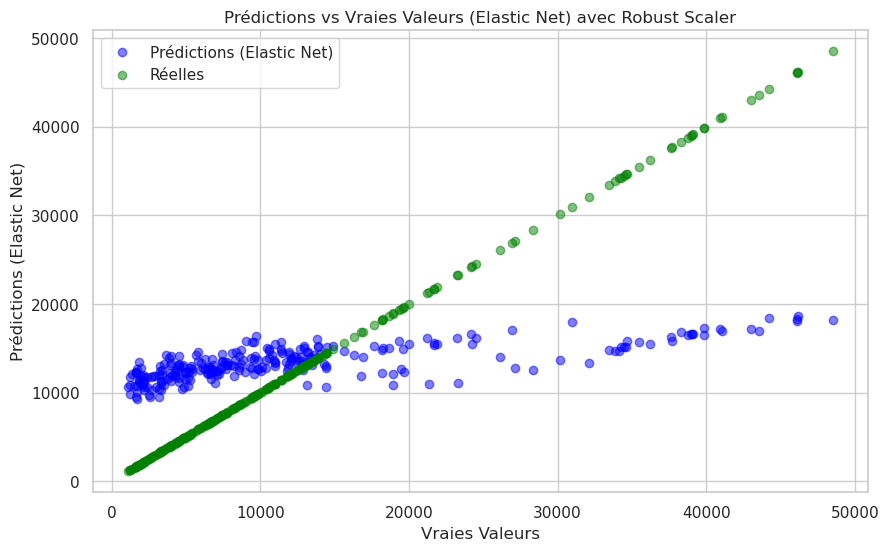

In [755]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler

# Diviser le DataFrame en features (X) et la target variable (y)
X = df[['age', 'smoker', 'bmi', 'children', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']]
y = df['charges']

# Créer une colonne combinée pour la stratification
df['stratify_col'] = df['sex'] + df['smoker'] + df['NordOuest'] + df['NordEast'] + df['SudOuest'] + df['SudEast']

# Diviser les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(selected_features, y_target, test_size=0.2, random_state=42, stratify=df['stratify_col'])

# Ne pas oublier de supprimer la colonne de stratification après la division des données
df.drop('stratify_col', axis=1, inplace=True)

# Créer une instance de RobustScaler et ajuster aux données d'entraînement
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

# Liste des valeurs d'alpha et de rapport de mélange à essayer
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.01, 0.1, 0.5, 0.7, 0.9]

best_r2 = 0.0
best_alpha = 0.0
best_l1_ratio = 0.0

# Boucle sur les différentes valeurs d'alpha et de rapport de mélange
for alpha in alpha_values:
    for l1_ratio in l1_ratios:
        # Créer et entraîner un modèle Elastic Net avec les valeurs d'alpha et de rapport de mélange actuelles
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        elastic_net_model.fit(X_train_scaled, y_train)

        # Faire des prédictions sur l'ensemble de test
        y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)

        # Évaluer la performance du modèle
        r2 = r2_score(y_test, y_pred_elastic_net)

        print(f'R-squared (Elastic Net) with alpha={alpha} and l1_ratio={l1_ratio}: {r2:.4f}')

        # Mettre à jour la meilleure combinaison d'alpha et de rapport de mélange si le R-squared actuel est meilleur
        if r2 > best_r2:
            best_r2 = r2
            best_alpha = alpha
            best_l1_ratio = l1_ratio

print(f"Meilleur R-squared obtenu avec alpha={best_alpha} et l1_ratio={best_l1_ratio}: {best_r2:.4f}")

# Utiliser le modèle Elastic Net avec les meilleurs hyperparamètres
elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_model.fit(X_train_scaled, y_train)

# Visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5, label='Prédictions (Elastic Net)', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='Réelles', color='green')
plt.title('Prédictions vs Vraies Valeurs (Elastic Net) avec Robust Scaler')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions (Elastic Net)')
plt.legend()
plt.show()

R-squared (Lasso) with alpha=0.001: 0.7507
R-squared (Lasso) with alpha=0.01: 0.7507
R-squared (Lasso) with alpha=0.1: 0.7507
R-squared (Lasso) with alpha=1.0: 0.7507
R-squared (Lasso) with alpha=10.0: 0.7506
Meilleur R-squared obtenu avec alpha=0.001: 0.7507


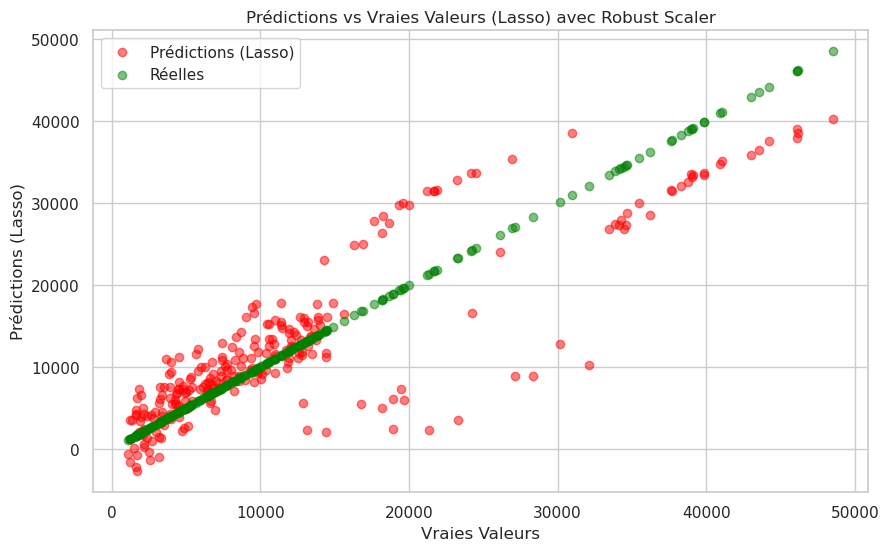

In [756]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler

# Diviser le DataFrame en features (X) et la target variable (y)
X = df[['age', 'smoker', 'bmi', 'children', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']]
y = df['charges']

# Créer une colonne combinée pour la stratification
df['stratify_col'] = df['sex'] + df['smoker'] + df['NordOuest'] + df['NordEast'] + df['SudOuest'] + df['SudEast']

# Diviser les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['stratify_col'])

# Ne pas oublier de supprimer la colonne de stratification après la division des données
df.drop('stratify_col', axis=1, inplace=True)

# Créer une instance de RobustScaler et ajuster aux données d'entraînement
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

# Liste des valeurs d'alpha à essayer
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]  # Ajoutez d'autres valeurs d'alpha selon votre besoin

best_r2 = 0.0
best_alpha = 0.0

# Boucle sur les différentes valeurs d'alpha
for alpha in alpha_values:
    # Créer et entraîner un modèle Lasso avec l'alpha actuel
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    # Évaluer la performance du modèle
    r2 = r2_score(y_test, y_pred_lasso)

    print(f'R-squared (Lasso) with alpha={alpha}: {r2:.4f}')

    # Mettre à jour la meilleure valeur d'alpha si le R-squared actuel est meilleur
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

print(f"Meilleur R-squared obtenu avec alpha={best_alpha}: {best_r2:.4f}")

# Utiliser le modèle Lasso avec le meilleur alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)

# Visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Prédictions (Lasso)', color='red')
plt.scatter(y_test, y_test, alpha=0.5, label='Réelles', color='green')
plt.title('Prédictions vs Vraies Valeurs (Lasso) avec Robust Scaler')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions (Lasso)')
plt.legend()
plt.show()

R-squared (Lasso) with alpha=0.001: 0.7816
MSE (Lasso) with alpha=0.001: 38750835.3943, RMSE: 6225.0169
Meilleur R-squared obtenu avec alpha=0.001: 0.7816
R-squared (Lasso) with alpha=0.01: 0.7816
MSE (Lasso) with alpha=0.01: 38750926.6741, RMSE: 6225.0242
Meilleur R-squared obtenu avec alpha=0.001: 0.7816
R-squared (Lasso) with alpha=0.1: 0.7816
MSE (Lasso) with alpha=0.1: 38751840.0213, RMSE: 6225.0976
Meilleur R-squared obtenu avec alpha=0.001: 0.7816
R-squared (Lasso) with alpha=1.0: 0.7816
MSE (Lasso) with alpha=1.0: 38761003.9666, RMSE: 6225.8336
Meilleur R-squared obtenu avec alpha=0.001: 0.7816
R-squared (Lasso) with alpha=10.0: 0.7810
MSE (Lasso) with alpha=10.0: 38855817.2278, RMSE: 6233.4434
Meilleur R-squared obtenu avec alpha=0.001: 0.7816
Meilleur alpha obtenu: 0.001 avec MSE: 38750835.3943, RMSE: 6225.0169


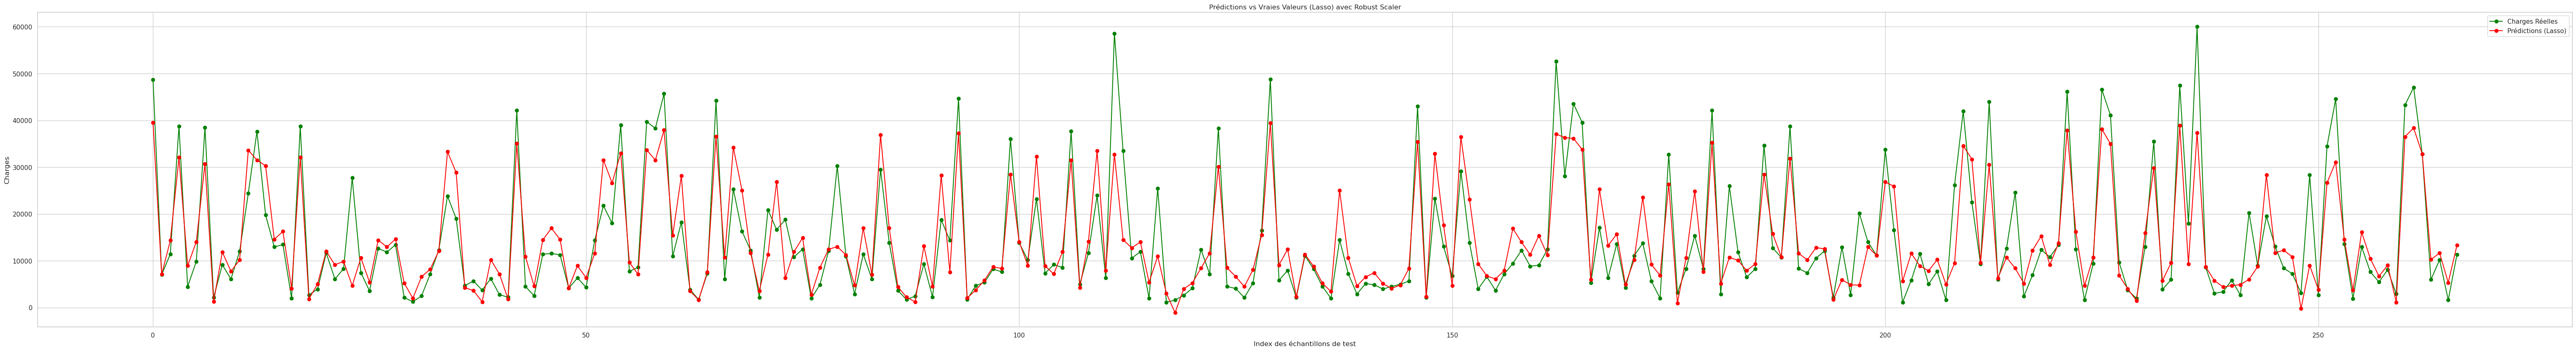

In [762]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
import numpy as np

# Diviser le DataFrame en features (X) et la target variable (y)
X = df[['age', 'smoker', 'bmi', 'children', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']]
y = df['charges']

# Créer une instance de RobustScaler et ajuster aux données
robust_scaler = RobustScaler()
X_scaled = robust_scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Liste des valeurs d'alpha à essayer
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]  

# Dictionnaire pour stocker les valeurs d'alpha et leurs erreurs
alpha_errors = {}

# Boucle sur les différentes valeurs d'alpha
for alpha in alpha_values:
    # Créer et entraîner un modèle Lasso avec l'alpha actuel
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred_lasso = lasso_model.predict(X_test)

    # Calculer l'erreur (MSE)
    mse = mean_squared_error(y_test, y_pred_lasso)

    # Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
    rmse = np.sqrt(mse)
    
    # Stocker les erreurs pour l'alpha actuel
    alpha_errors[alpha] = {'MSE': mse, 'RMSE': rmse}
    
    # Évaluer la performance du modèle
    r2 = r2_score(y_test, y_pred_lasso)

    print(f'R-squared (Lasso) with alpha={alpha}: {r2:.4f}')
    
    print(f'MSE (Lasso) with alpha={alpha}: {mse:.4f}, RMSE: {rmse:.4f}')

    # Mettre à jour la meilleure valeur d'alpha si le R-squared actuel est meilleur
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        
    print(f"Meilleur R-squared obtenu avec alpha={best_alpha}: {best_r2:.4f}")


# Trouver la meilleure valeur d'alpha avec la plus faible MSE
best_alpha = min(alpha_errors, key=lambda x: alpha_errors[x]['MSE'])
best_mse = alpha_errors[best_alpha]['MSE']
best_rmse = alpha_errors[best_alpha]['RMSE']

print(f"Meilleur alpha obtenu: {best_alpha} avec MSE: {best_mse:.4f}, RMSE: {best_rmse:.4f}")

# Utiliser le modèle Lasso avec le meilleur alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_lasso = lasso_model.predict(X_test)

# Créer un index pour les échantillons de test
index_test = np.arange(len(X_test))

# Créer un DataFrame pour les valeurs réelles et prédites
results_df = pd.DataFrame({'Index': index_test, 'Charges Réelles': y_test.values, 'Prédictions': y_pred_lasso})

# Trier le DataFrame par l'index pour un affichage correct
results_df.sort_values(by='Index', inplace=True)

# Tracer les valeurs réelles et prédites par index
plt.figure(figsize=(80, 10))
plt.plot(results_df['Index'], results_df['Charges Réelles'], label='Charges Réelles', marker='o', linestyle='-', color='green')
plt.plot(results_df['Index'], results_df['Prédictions'], label='Prédictions (Lasso)', marker='o', linestyle='-', color='red')
plt.title('Prédictions vs Vraies Valeurs (Lasso) avec Robust Scaler')
plt.xlabel('Index des échantillons de test')
plt.ylabel('Charges')
plt.legend()
plt.show()